<a href="https://colab.research.google.com/github/devadathprabhu/DSC612/blob/main/L9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

100%|██████████| 20/20 [00:00<00:00, 341.02it/s]


Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 80, 80, 3)]       0         
                                                                 
 conv2d_49 (Conv2D)          (None, 80, 80, 256)       7168      
                                                                 
 conv2d_50 (Conv2D)          (None, 80, 80, 128)       295040    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 40, 40, 128)      0         
 2D)                                                             
                                                                 
 conv2d_51 (Conv2D)          (None, 40, 40, 64)        73792     
                                                                 
 conv2d_52 (Conv2D)          (None, 40, 40, 64)        36928     
                                                           

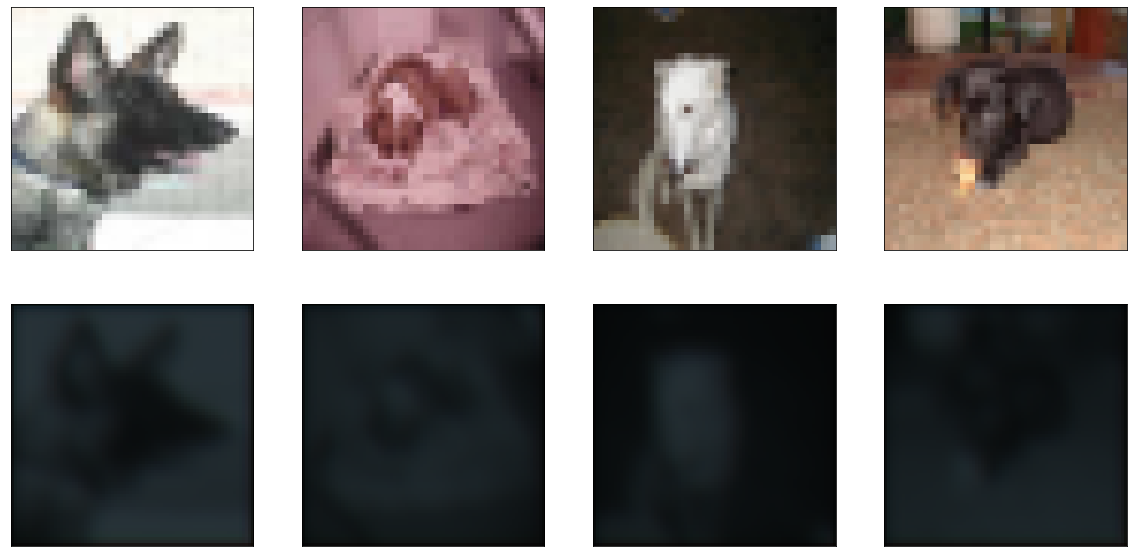

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras import Model, Input, regularizers
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing import image
import glob
from tqdm import tqdm
import warnings;
warnings.filterwarnings('ignore')
face_images = glob.glob('/content/cifar10/*.jpg')
all_images = []
for i in tqdm(face_images):
  img = image.load_img(i, target_size=(80,80,3))
  img = image.img_to_array(img)
  img = img/255.
  all_images.append(img)
all_images = np.array(all_images)
train_x, val_x = train_test_split(all_images, random_state=32, test_size=0.2)
def pixalate_image(image, scale_percent = 40):
  width = int(image.shape[1] * scale_percent / 100)
  height = int(image.shape[0] * scale_percent / 100)
  dim = (width, height)
  small_image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)
  width = int(small_image.shape[1] * 100 / scale_percent)
  height = int(small_image.shape[0] * 100 / scale_percent)
  dim = (width, height)
  low_res_image = cv2.resize(small_image, dim, interpolation = cv2.INTER_AREA)
  return low_res_image
train_x_px = []
for i in range(train_x.shape[0]):
  temp = pixalate_image(train_x[i,:,:,:])
  train_x_px.append(temp)
train_x_px = np.array(train_x_px)
val_x_px = []
for i in range(val_x.shape[0]):
  temp = pixalate_image(val_x[i,:,:,:])
  val_x_px.append(temp)
val_x_px = np.array(val_x_px)
train_x_px = []
for i in range(train_x.shape[0]):
  temp = pixalate_image(train_x[i,:,:,:])
  train_x_px.append(temp)
train_x_px = np.array(train_x_px)
val_x_px = []
for i in range(val_x.shape[0]):
  temp = pixalate_image(val_x[i,:,:,:])
  val_x_px.append(temp)
val_x_px = np.array(val_x_px)
Input_img = Input(shape=(80, 80, 3))  
x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(Input_img)
x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x1)
x2 = MaxPool2D( (2, 2))(x2)
encoded = Conv2D(64, (3, 3), activation='relu', padding='same')(x2)
x3 = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x3 = UpSampling2D((2, 2))(x3)
x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x3)
x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(x2)
decoded = Conv2D(3, (3, 3), padding='same')(x1)
autoencoder = Model(Input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()
early_stopper = EarlyStopping(monitor='val_loss', 
                              min_delta=0.0001, patience=4, 
                              verbose=1, mode='auto')
a_e = autoencoder.fit(train_x_px, train_x,
            epochs=5,
            batch_size=256,
            shuffle=True,
            validation_data=(val_x_px, val_x),
            callbacks=[early_stopper])
predictions = autoencoder.predict(val_x_px)
predictions = autoencoder.predict(val_x_px)
n = 4
plt.figure(figsize= (20,10))
for i in range(n):
  ax = plt.subplot(2, n, i+1)
  plt.imshow(val_x_px[i])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  ax = plt.subplot(2, n, i+1+n)
  plt.imshow(predictions[i])
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()